In [1]:
import matplotlib.pyplot as plt

In [2]:
from numpy import *

In [3]:
nfreq=1000;

In [4]:
w = linspace(36, 44, nfreq);

In [5]:
ncav=1.5; Lcav=1;

In [6]:
def wcav(m) : return (m+0.5)*pi/(ncav*Lcav);

In [7]:
w0=wcav(17); w1=wcav(18); w2=wcav(19); w3=wcav(20);

In [8]:
mydata = genfromtxt("output.dat", delimiter=","); # output.dat has two columns (t, Ex(t))

In [9]:
Fw = zeros(nfreq, dtype=complex128);

In [10]:
for n in range(0, nfreq):
    Fw[n] = dot(exp(1j*w[n]*mydata[:,0]), mydata[:,1]);

In [11]:
plt.plot(w,abs(Fw),'bo-');

In [12]:
plt.xlabel("angular frequency"); plt.ylabel("Fourier Transform of cavity field");

In [13]:
plt.axis([36, 44, 0, 1e16]);

In [14]:
plt.xticks([w for w in range(36,46,2)]);

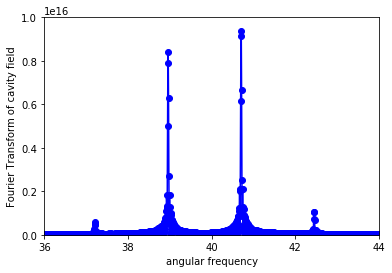

In [15]:
plt.show()

In [16]:
tol=0.01; npts=20;

In [17]:
peak0_idx = where(abs(Fw) == max(abs(Fw[(w > (1-tol)*w0) & (w < (1+tol)*w0)])))

In [18]:
peak1_idx = where(abs(Fw) == max(abs(Fw[(w > (1-tol)*w1) & (w < (1+tol)*w1)])))

In [19]:
peak2_idx = where(abs(Fw) == max(abs(Fw[(w > (1-tol)*w2) & (w < (1+tol)*w2)])))

In [20]:
peak3_idx = where(abs(Fw) == max(abs(Fw[(w > (1-tol)*w3) & (w < (1+tol)*w3)])))

In [21]:
print("peak heights: ",abs(Fw[peak0_idx[0][0]]),abs(Fw[peak1_idx[0][0]]),abs(Fw[peak2_idx[0][0]]),abs(Fw[peak3_idx[0][0]]))

peak heights:  4.05578023339e+13 8.42720992116e+15 9.37398455381e+15 1.42640117244e+14


In [22]:
print("peak sums: ",sum(abs(Fw[(peak0_idx[0][0]-npts):(peak0_idx[0][0]+npts+1)])),sum(abs(Fw[(peak1_idx[0][0]-npts):(peak1_idx[0][0]+npts+1)])),sum(abs(Fw[(peak2_idx[0][0]-npts):(peak2_idx[0][0]+npts+1)])),sum(abs(Fw[(peak3_idx[0][0]-npts):(peak3_idx[0][0]+npts+1)])))

peak sums:  1.14331209847e+15 5.1897199634e+16 5.87334079517e+16 6.75855534467e+15
